# Visualize coin data to spot specifications

In [1]:
import os
import os.path
import time
import h5py
from util.settings import Dtype, Settings
import numpy as np
import argparse
import matplotlib.pyplot as plt
from datafileviewer_template import DataFileViewer
from datafilereader import DataFileReader
import matplotlib
import pandas as pd

### load Data

In [2]:
folder = "./data/Groupe5/dataSetAGF-bobine3/"

coinNames = ["5_CTS", "10_CTS", "20_CTS", "50_CTS", "1_CHF", "2_CHF", "5_CHF"]

#get frequecy at the first coin (always the same)
dataset = DataFileReader(folder+coinNames[0]+".h5")
f,_ = dataset.get_all_mesurements()

# nbr of frequencies points
print("nbr of frequencies points: ",len(f))

# get Z for all coins
coins_Z = []
for i in range(1, 8):
    dataset = DataFileReader(folder+coinNames[i-1]+".h5")
    _,Z = dataset.get_all_mesurements()
    coins_Z.append([Z])

print("nbr of coins loaded in coins_Z: ",len(coins_Z))




nbr of frequencies points:  72
nbr of coins loaded in coins_Z:  7


### compute mean for each coin

In [10]:
# # Function to separate resistance (real part) and reactance (imaginary part)
# def separate_resistance_reactance(Z,F):
#     df = pd.DataFrame(Z, columns=[f"Freq_{i}" for i in range(len(Z[1]))])
#     resistance_df = df.map(lambda x: np.real(x))
#     reactance_df = df.map(lambda x: np.imag(x))
#     reactance_df = reactance_df/(2*np.pi*F)
#     return resistance_df, reactance_df

# def calibWeightedMean(Z,F):
#     R,L = separate_resistance_reactance(Z,F)
#     # substract all the data by the calibration
#     R = R[1:,:]-R[0,:]
#     L = L[1:,:]-L[0,:]
#     # calculate the weighted mean
#     R_mean = np.mean(R, axis=0)
#     L_mean = np.mean(L, axis=0)
#     return R_mean,L_mean

#extract the resistance and reactance for each coin make weigth with calibration and calculate the mean

coins_mean = []

for i in range(len(coins_Z)):
    N = len(coins_Z[i][0]) #number of measurements for this coin
    R = np.real(coins_Z[i][0])
    L = np.imag(coins_Z[i][0])/(2*np.pi*f)
    # substract all the data by the calibration
    R = R[1:,:]-R[0,:]
    L = L[1:,:]-L[0,:]
    # calculate the mean
    R_mean = np.mean(R, axis=0)
    L_mean = np.mean(L, axis=0)
    coins_mean.append([R_mean,L_mean])

    

: 

### visualize data

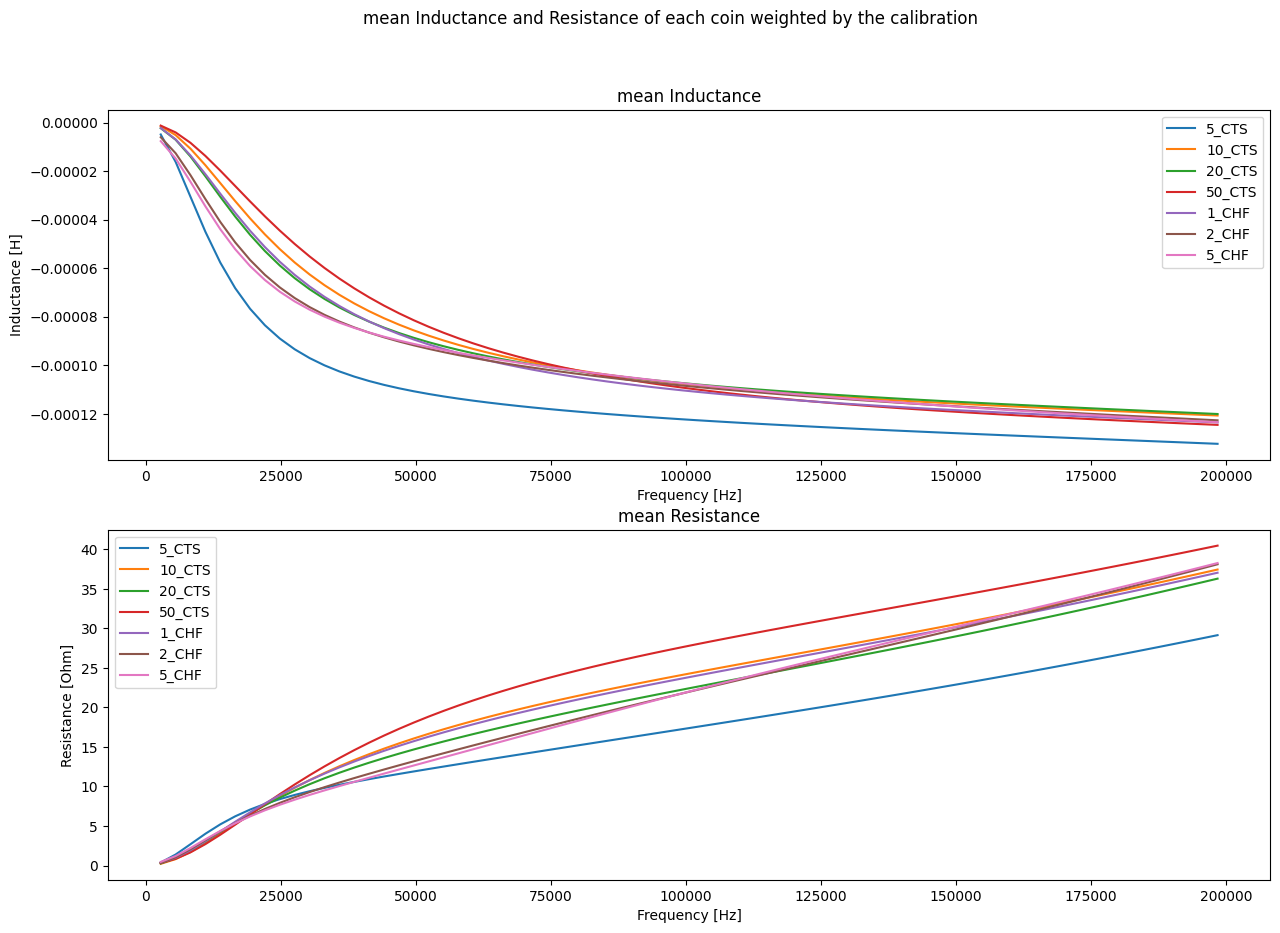

In [4]:
plt.figure(figsize=(15,10))
plt.suptitle("mean Inductance and Resistance of each coin weighted by the calibration")
plt.subplot(2,1,1)
plt.title("mean Inductance")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Inductance [H]")
for i in range(len(coins_mean)):
    plt.plot(f, coins_mean[i][1], label=coinNames[i])
plt.legend()
plt.subplot(2,1,2)
plt.title("mean Resistance")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Resistance [Ohm]")
for i in range(len(coins_mean)):
    plt.plot(f, coins_mean[i][0], label=coinNames[i])
plt.legend()
plt.show()

# search optimal features (frequency) for the classification

In [5]:

featureListR = []
featureListL = []
#search best frequencies for R
for i in range(len(coins_Z)):
    for j in range(i+1,len(coins_Z)):
        dif_R  = np.abs(coins_mean[i][0] - coins_mean[j][0])
        idxMax = np.argmax(dif_R)
        if idxMax not in featureListR:
            featureListR.append(idxMax)

#search best frequencies for L
for i in range(len(coins_Z)):
    for j in range(i+1,len(coins_Z)):
        dif_L  = np.abs(coins_mean[i][1] - coins_mean[j][1])
        idxMax = np.argmax(dif_L)
        if idxMax not in featureListL:
            featureListL.append(idxMax)



print("number of optimal features : ", len(featureListR)+len(featureListL))
print("optimal features for R : ", sorted(featureListR))
print("optimal features for L : ", sorted(featureListL))


number of optimal features :  20
optimal features for R :  [17, 20, 21, 22, 26, 28, 31, 32, 39, 42, 44, 71]
optimal features for L :  [4, 5, 6, 7, 8, 9, 12, 61]


### display R & L with selected features

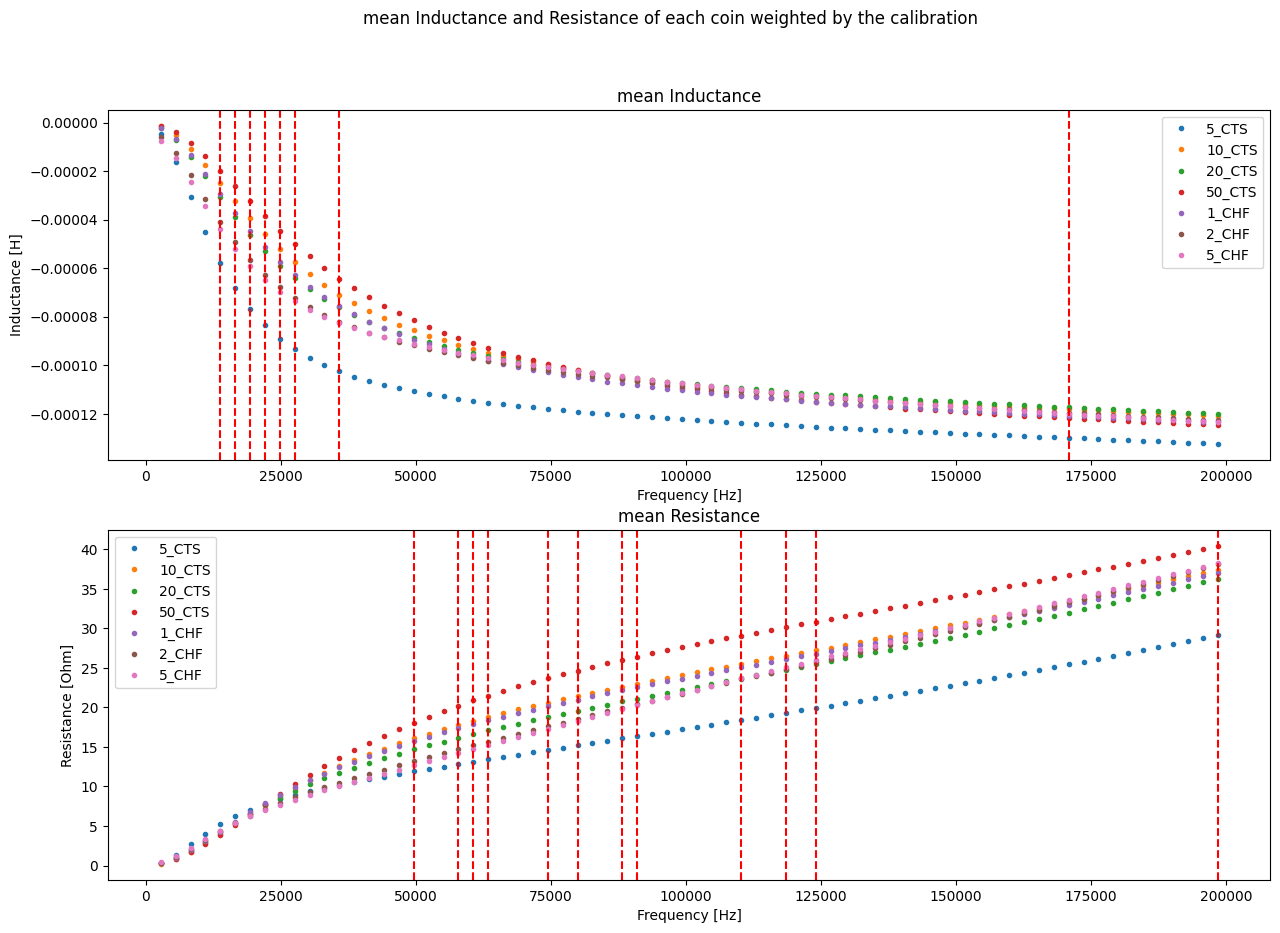

In [6]:
plt.figure(figsize=(15,10))
plt.suptitle("mean Inductance and Resistance of each coin weighted by the calibration")
plt.subplot(2,1,1)
plt.title("mean Inductance")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Inductance [H]")
for i in range(len(coins_mean)):
    plt.plot(f, coins_mean[i][1],'.', label=coinNames[i])

for i in featureListL:
    plt.axvline(x=f[i],color='r', linestyle='--')
plt.legend()
plt.subplot(2,1,2)
plt.title("mean Resistance")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Resistance [Ohm]")
for i in range(len(coins_mean)):
    plt.plot(f, coins_mean[i][0],'.', label=coinNames[i])

for i in featureListR:
    plt.axvline(x=f[i], color='r', linestyle='--')
plt.legend()
plt.show()